In [1]:
%%HTML


<p>"""
    Project: LUX Data Script
    File: scriptVersionFour.ipynb
    Author: Zackary Bair


    Plots a given variable from the lux data files.
    If the file does not exist in the host directory, then download it from the storage server.
"""</p>


In [2]:
#IMPORTS
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

from os import listdir #used to see what files are in a given directory
import numpy as np
from scipy.io import loadmat #this is the SciPy module that loads .mat files
import matplotlib.pyplot as plt #for plotting the data
import sys #for the exit command

#/~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [3]:
#GLOBAL VARIABLES
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#hard coded file destination
#when a new user downloads this program to their machine they can change the file destination for the host machine here
hostFileDestination = 'C:/Users/bairz/Documents/RISE/2020/Summer/Data/'
userFile = ''
importantKeys = ['x_cm against y_cm', 's2_rec', 's1', 's2']

#/~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [16]:
#FUNCTIONS
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
"""
    Prints out all elements from a list structure from a given value, to the end of the list structure.
    Takes in an integer for the starting index for the list structure.
    Takes in a list structure to be printed from.
"""
def forEachPrint(startingValue, array):
    counter = startingValue
    for i in array:
        print(counter, '.', array[counter - 1])
        counter += 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

"""
    Adds elements from one list structure to a different list structure.
    Takes in a list structure that is the source list.
    Takes in another list structure that is the desitnation list.
    Takes in a boolean that checks if there will be a condition added to the moving of list elements.
"""
def forEachAppend(itterableArray, holdingArray, condition):
    for i in itterableArray:
        if (condition == False):
            holdingArray.append(i)
        elif ('.mat' in i and condition == True): #the file name contains .mat
            holdingArray.append(i)
            
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            
def combineFiles(host):
    print('Enter all file numbers you would like to combine.')
    print('Example: "1 3 4".')
    userFiles = input('-->: ')
    
    #creates an array of files from the userFiles
    
            
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def combineDirectories():
    print('Enter all folder numbers you would like to combine.')
    print('Example: "1 3 4".')
    userFiles = input('-->: ')

#/~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Is the directory "C:/Users/bairz/Documents/RISE/2020/Summer/Data/" the correct host machine directory?
Yes or no?
-->: yes


1 . lux10_20130510T1250_f000853_cp10021.rq.mat
2 . lux10_20131021T2229_f000954_cp17328.rq.mat
3 . lux10_20141107T1904_f022994_cp16976.rq.mat
4 . lux10_20160108T1041_f000001_cp19135.rq.mat
5 . TestFolder

If the file you are looking for is on the list, please enter the corresponding number for your file.
If you want to combine multiple files, enter "f".
If you want to combine directories, enter "d".
-->: 5


1 . x_cm against y_cm
2 . s2_rec
3 . s1
4 . s2

If the variable you are looking for is on the list, please enter the corresponding number for your variable.
If the variable you are looking for is not on the list, enter any unlisted value.
-->: 1

Plotting x_cm vs. y_cm.
Would you like to save the plot?
Yes or no?
-->: no


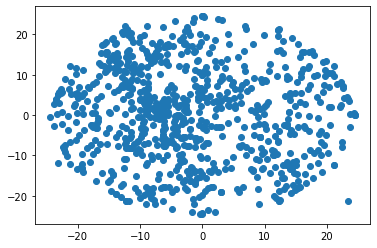

PROGRAM HAS FINISHED.  PROGRAM ENDED.


In [17]:
#MAIN
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#LOOK FOR DATASET IN THE FILE DESTINATION ON THE HOST MACHINE
#is the current directory the correct one for the host machine?
while (True):
    #ask if the directory is the correct one
    print(f'Is the directory \"{hostFileDestination}\" the correct host machine directory?')
    print('Yes or no?')

    #gets user input
    userInput = input('-->: ')
    print() #blank space for better formatting

    #if file destination is not correct
    if (userInput.lower() != 'yes'):
        #ask for new file destination
        print('Please enter the correct file destionation on the host machine.  Use the format seen above.')

        #get new file destionation for the host machine
        hostFileDestination = input('-->: ')
        print() #blank space for better formatting
    
    #file destination is correct
    else:
        break
     
print() #blank space for better formatting
    

#prints out all .mat files in the selected directory
#get all of the files from the directory
ls = listdir(hostFileDestination) #an array of everything in the file destination

#print only the .mat files
forEachPrint(1, ls)
matls = []
forEachAppend(ls, matls, True)

print() #blank space for better formatting

        
#ASKS USER FOR THE FILE
while(True):
    try:
        print('If the file you are looking for is on the list, please enter the corresponding number for your file.')
        print('If you want to combine multiple files, enter "f".')
        print('If you want to combine directories, enter "d".')
        fileIndex = input('-->: ') #the - 1 is to get the true index of the file within the array, 0 will become -1
        print() #blank space for better formatting
        
        
        #CHECK FILE
        #multi file?
        if (str(fileIndex.lower()) == 'f'):
            rq = combineFiles(hostFileDestination)
        
        #multi directory?
        elif (str(fileIndex.lower()) == 'd'):
              combineDirectories()
                
        #entered a file
        elif (int(fileIndex) - 1< 1 or int(fileIndex) - 1 > len(ls)):
            userFile = matls[int(fileIndex)]
            
            #LOADS THE MAT FILE
            fullDestination = hostFileDestination + userFile
            rq = loadmat(fullDestination)


    #if the integer inputed is > the length of matls
    #if the user inputs a string
    except:
        print('ERROR: You did not enter an acceptable value.\n')
        
    else:
        break
print() #blank space for better formatting


#LOADS ALL KEYS
keys = []
forEachAppend(rq, keys, False)
    
    
#MOVES IMPORTANT KEYS TO THE FRONT OF THE LIST
for i in importantKeys:
    #if the important key exists in the middle of the keys list
    if (i in keys):
        #remove the important key from the middle of the keys list
        keys.remove(i)
    #add the important key to the front of the keys list
    keys.insert(0, i)


#GET THE KEY (VARIABLE TO PRINT OUT)
#prints out the important keys
forEachPrint(1, importantKeys)

print() #blank space for better formatting
    
    
#ASKS USER FOR THE KEY (VARIABLE)
isImportantKey = True
print('If the variable you are looking for is on the list, please enter the corresponding number for your variable.')
print('If the variable you are looking for is not on the list, enter any unlisted value.')
keyIndex = int(input('-->: ')) - 1 #the - 1 is to get the true index of the file within the array, 0 will become -1

print() #blank space for better formatting


#DOES THE FILE EXIST?    
#file is not on the list
if (keyIndex < 0 or keyIndex > len(importantKeys)):
    print('Showing other variables.')
    #prints the rest of the keys
    forEachPrint(1, keys[len(importantKeys):]) #restriction on keys is to ommit the important keys from the list
    isImportantKey = False
    
    print('Please enter the corresponding number for your variable')
    keyIndex = int(input('-->: ')) - 1 + len(importantKeys) #adding the important keys will ommit the importany keys
    
    print() #blank space for better formatting
    

#PLOT THE GIVEN VARIABLE
#TODO the key is an important key
if (isImportantKey):
    #plot x_cm and y_cm
    if (importantKeys[keyIndex] == 'x_cm against y_cm'):
        print('Plotting x_cm vs. y_cm.')
        
        x = rq['x_cm'] #saves x events
        y = rq['y_cm'] #saves y events
        goodevents =(x < 25) & (x > -25) & (y < 25) & (y > -25) #we know all important stuff is between -25 and 25
        x = x[goodevents] #saves only important x events
        y = y[goodevents] #saves only important y events
        plt.plot(x,y,"o") #creates the plot
    
    elif (importantKeys[keyIndex] == 's2_rec'):
        print('Plotintg s2_rec')
        
        tempData = rq['s2_rec']
        plt.plot(tempData, 'o')
    
    elif (importantKeys[keyIndex] == 's1'):
        print('The histogram for the plot.')
        
        pulse_area_phe = rq['pulse_area_phe']
        pulse_classification = rq['pulse_classification']
        s1 = pulse_area_phe[pulse_classification==1]
        tempData = s1.flatten()
        tempBins = np.arange(0,1000,5)
        isS1 = True
        
        plt.hist(tempData, bins = tempBins)
        plt.yscale('log')
        plt.xlabel("s1 area [phe]")
    
    elif (importantKeys[keyIndex] == 's2'):
        print('The histogram for the plot.')
        
        pulse_area_phe = rq['pulse_area_phe']
        pulse_classification = rq['pulse_classification']
        s2 = pulse_area_phe[pulse_classification==2]
        tempData = s2.flatten()
        tempBins = np.arange(0,10000,50)
        isS1 = False
        
        plt.hist(tempData, bins = tempBins)
        plt.yscale('log')
        plt.xlabel("s2 area [phe]")
    
    else:
        print('ERROR')
    
#the key was not an important key
else:
    keyName = keys[keyIndex]
    temp = rq[keys[keyIndex]] #sets a temporary variable to the values within the key
    if (keyIndex >= 5):
        temp = temp.flatten() #the first 5 keys can not be flattened
    plt.plot(temp)
    
    
#SAVE THE PLOT?
print('Would you like to save the plot?')
print('Yes or no?')
willSave = input('-->: ')

#YES?
if (willSave.lower() == 'yes'):
    #SAVE PLOT
    figureName = userFile[:-7] + '_' + keyName #saves to the same directory as the script
    plt.savefig(figureName)
    
plt.show() #always show the plot


#END SCRIPT
print('PROGRAM HAS FINISHED.  PROGRAM ENDED.')

#/~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
